# Judul: <br>
# **Analisis pengaruh Network Type terhadap Performance Jaringan Seluler**

# Project Introduction / Penentuan Dataset dengan Latar Belakang Bisnis

Dataset yang digunakan dalam project ini adalah "signal_metrics.csv" dari
kaggle. Dataset ini memberikan sampel pengukuran sinyal untuk berbagai jenis jaringan di 20 lokasi di Bihar, India yang di ukur oleh 4 device (DragonOS Focal Steam Deck + Spike LTE Analysis (BB60C, srsRan, BladeRFxA9) Data).<br>
Dalam final project kali ini, dataset ini saya gunakan untuk menganalisa pengaruh Network type terhadap performance jaringan.

# Penentuan Masalah dan Tujuan Bisnis

Dalam Project Machine Learning ini, saya akan mencoba membuat model prediksi berdasarkan fitur-fitur dari kolom pada dataset, yaitu:
- Korelasi terbesar dari kolom Fitur dengan Kolom Target?
- Apakah fitur/ kolom Network type (3G, LTE, 4G, 5G) memiliki pengaruh yang significant dalam performance jaringan (Signal Strength,Data Throughput Data dan Latensi)?
- Insight apa yang bisa di dapatkan dan apa solusi yang kira-kira bisa di berikan untuk meningkatkan performance jaringan.


# Signal Metrics Dataset

**Features**:
Dataset ini memiliki 16829 baris dengan 12 fitur/ kolom sebagai berikut:<br>

**Timestamp**: Waktu ketika pengukuran sinyal dilakukan.<br>
**Locality**: Lokasi tempat pengukuran sinyal diambil.<br>
**Latitude**: Garis lintang lokasi pengukuran.<br>
**Longitude**: Garis bujur lokasi pengukuran.<br>
**Signal Strength (dBm)**: Kekuatan sinyal yang diukur dalam desibel-milliwatt.<br>
**Signal Quality (%)**: Persentase kualitas sinyal.<br>
**Data Throughput (Mbps)**: Kecepatan data yang diukur dalam Megabit per detik.<br>
**Latency (ms)**: Latensi jaringan yang diukur dalam milidetik.<br>
**Network Type**: Tipe jaringan (meliputi 3G, 4G, LTE, 5G).<br>
**BB60C Measurement (dBm)**: Pengukuran sinyal menggunakan perangkat BB60C.<br>
**srsRAN Measurement (dBm)**: Pengukuran sinyal menggunakan perangkat lunak srsRAN.<br>
**BladeRFxA9 Measurement (dBm)**: Pengukuran sinyal menggunakan perangkat BladeRFxA9.

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split #Split data ke train dan test
from sklearn.preprocessing import StandardScaler #Feature scaling/Normalisasi
from sklearn.model_selection import cross_val_score #Model Evaluation dengan cross-validasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Classification report, accuracy score dan confusion matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset Preparation

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mouriverd Laurent - Progress Script Final Project/signal_metrics.csv')
df.sample(5)

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
14195,01:28.4,Ashok Rajpath,25.511359,85.168625,-90.194477,0,4.955797,57.665141,4G,-88.616532,-99.886451,-87.452076
3871,08:50.6,Ashok Rajpath,25.689492,85.120329,-90.242521,0,1.228539,145.875572,3G,0.000000,0.000000,0.000000
4645,23:51.3,Phulwari Sharif,25.596663,85.273746,-90.594178,0,7.087768,62.950775,4G,-85.669945,-97.650977,-91.981742
14056,47:46.2,Phulwari Sharif,25.754090,85.062019,-103.518483,0,17.454790,16.768361,5G,-99.399440,-112.221053,-105.510479
14010,24:14.5,Danapur,25.433521,85.129433,-89.283780,0,3.881960,56.043666,4G,-93.075734,-96.421260,-90.778647


Pembacaan data secara umum,  yaitu terdapat 4 kolom yang memiliki satuan yang sama, yaitu dbm yang menggambarkan kekuatan sinyal dari masing-masing device <br>
Untuk Data Througput (Mbps) dan latency (ms) hanya ada 1 pengukuran, merupakan hasil dari pengukuran kecepatan data dan latency yang di terima oleh 1 device yaitu steam deck.<br>
Demikian pula dengan network type hanya ada 1 jenis, merupakan netowork type yang di terima oleh device steam deck.

# EDA & Data Manipulation

In [5]:
# @title Default title text
# Menampilkan informasi dasar tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16829 entries, 0 to 16828
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     16829 non-null  object 
 1   Locality                      16829 non-null  object 
 2   Latitude                      16829 non-null  float64
 3   Longitude                     16829 non-null  float64
 4   Signal Strength (dBm)         16829 non-null  float64
 5   Signal Quality (%)            16829 non-null  int64  
 6   Data Throughput (Mbps)        16829 non-null  float64
 7   Latency (ms)                  16829 non-null  float64
 8   Network Type                  16829 non-null  object 
 9   BB60C Measurement (dBm)       16829 non-null  float64
 10  srsRAN Measurement (dBm)      16829 non-null  float64
 11  BladeRFxA9 Measurement (dBm)  16829 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 1.5+ MB


In [6]:
#melihat missing value
df.isna().sum()

Timestamp                       0
Locality                        0
Latitude                        0
Longitude                       0
Signal Strength (dBm)           0
Signal Quality (%)              0
Data Throughput (Mbps)          0
Latency (ms)                    0
Network Type                    0
BB60C Measurement (dBm)         0
srsRAN Measurement (dBm)        0
BladeRFxA9 Measurement (dBm)    0
dtype: int64

In [7]:
#melihat duplikat data
df.duplicated().sum()

0

In [8]:
#menampilkan summary statistik numerikal
df.describe()

,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
count,16829.000000,16829.000000,16829.000000,16829.0,16829.000000,16829.000000,16829.000000,16829.000000,16829.000000
mean,25.594796,85.137314,-90.072484,0.0,16.182856,101.313624,-68.820150,-74.439562,-68.819930
std,0.089881,0.090095,5.399368,0.0,25.702734,56.010418,40.046739,43.215204,39.996934
min,25.414575,84.957936,-116.942267,0.0,1.000423,10.019527,-115.667514,-124.652054,-119.207545
25%,25.522858,85.064124,-93.615962,0.0,2.001749,50.320775,-94.021959,-101.249987,-93.749032
50%,25.595383,85.138149,-89.665566,0.0,2.997175,100.264318,-89.126942,-96.838442,-89.282746
75%,25.667620,85.209504,-86.145491,0.0,9.956314,149.951112,0.000000,0.000000,0.000000
max,25.773648,85.316994,-74.644848,0.0,99.985831,199.991081,0.000000,0.000000,0.000000


Dari summary statistik nya ditemukan bahwa Kolom Signal Quality (%) semuanya berisi 0 dan beberapa kolom yaitu BB60C Measurement (dBm), srsRAN Measurement (dBm), BladeRFxA9 Measurement (dBm) mengandung nilai 0, sehingga akan di lakukan action sbb:<br>
- Drop kolom Signal Quality (%),<br>
- Replace value 0 to median, kolom BB60C Measurement (dBm), srsRAN Measurement (dBm), BladeRFxA9 Measurement (dBm).

In [9]:
#Mengganti nilai 0 di kolom BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm) dengan median
columns_to_replace = ['BB60C Measurement (dBm)','srsRAN Measurement (dBm)','BladeRFxA9 Measurement (dBm)']

for column in columns_to_replace:
    median_value = df[column].median()
    df[column] = df[column].replace(0, median_value)

#Drop kolom  Signal Quality
df = df.drop(columns='Signal Quality (%)',axis=1)
df.sample(5)

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
2224,29:55.4,Patliputra Colony,25.662547,84.988060,-89.521608,1.137378,181.711967,LTE,-88.629248,-98.701589,-91.157435
4451,18:32.5,Patliputra Colony,25.536496,85.062089,-80.026629,1.288207,118.171206,3G,-89.126942,-96.838442,-89.282746
15381,41:59.7,S.K. Puri,25.536306,85.198908,-89.072261,2.273715,131.275485,LTE,-86.042015,-97.043852,-87.024699
15834,15:25.9,Bankipore,25.698073,85.034565,-89.738409,58.707808,18.160609,5G,-92.130576,-95.825388,-87.610569
1860,34:10.9,Anisabad,25.476660,85.115030,-87.872089,1.941951,140.303312,LTE,-85.928237,-95.851318,-90.651706


In [10]:
df.describe()

,Latitude,Longitude,Signal Strength (dBm),Data Throughput (Mbps),Latency (ms),BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
count,16829.000000,16829.000000,16829.000000,16829.000000,16829.000000,16829.000000,16829.000000,16829.000000
mean,25.594796,85.137314,-90.072484,16.182856,101.313624,-91.105858,-98.653488,-91.144596
std,0.089881,0.090095,5.399368,25.702734,56.010418,5.083332,4.584835,4.659812
min,25.414575,84.957936,-116.942267,1.000423,10.019527,-115.667514,-124.652054,-119.207545
25%,25.522858,85.064124,-93.615962,2.001749,50.320775,-94.021959,-101.249987,-93.749032
50%,25.595383,85.138149,-89.665566,2.997175,100.264318,-89.126942,-96.838442,-89.282746
75%,25.667620,85.209504,-86.145491,9.956314,149.951112,-89.126942,-96.838442,-89.282746
max,25.773648,85.316994,-74.644848,99.985831,199.991081,-72.503415,-81.320092,-74.512825


Setelahnya dilakukan encoding / labeling terhadap data pada kolom network type berdasarkan urutan technology-nya (3G, LTE, 4G, 5G), dropping kolom network type yang lama dan juga kolom-kolom lain yang di rasa tidak diperlukan akan di drop.

In [11]:
df['Network Type'].unique()

array(['3G', '4G', 'LTE', '5G'], dtype=object)

In [12]:
#Melihat distribusi Network Type
valid_networks = ['3G','LTE','4G', '5G']
df = df[df['Network Type'].isin(valid_networks)]
df.groupby('Network Type').size().reset_index()

,Network Type,0
0,3G,4208
1,4G,4219
2,5G,4178
3,LTE,4224


Data masih balance

In [13]:
#Drop kolom-kolom yang tidak digunakan
df = df.drop(columns=['Timestamp','Locality','Latitude','Longitude'],axis=1)

membuat Encoding/labeling berdasarkan tingkat network technology: yaitu 3G, LTE, 4G dan 5G.

In [14]:
# Pembuatan Encoding/Labeling untuk masing-masing jenis sinyal
df['network_encoded'] = df['Network Type'].map({'3G':1,'LTE' :2 ,'4G': 3, '5G': 4})

# Drop Kolom Jenis sinyal yang lama
df = df.drop('Network Type', axis=1)
df

,Signal Strength (dBm),Data Throughput (Mbps),Latency (ms),BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm),network_encoded
0,-84.274113,1.863890,129.122914,-89.126942,-96.838442,-89.282746,1
1,-97.653121,5.132296,54.883606,-95.810791,-105.452359,-99.920892,3
2,-87.046134,1.176985,119.598286,-91.593861,-95.419482,-87.714070,2
3,-94.143159,68.596932,46.598387,-90.642773,-101.895905,-96.570698,4
4,-94.564765,38.292038,30.342828,-90.489100,-103.318303,-95.102467,4
...,...,...,...,...,...,...,...
16824,-92.024221,3.720856,53.376474,-90.177947,-97.971619,-93.362041,3
16825,-87.579509,2.117080,134.458401,-87.694985,-92.616868,-84.749607,2
16826,-90.451396,72.870842,32.556578,-91.098875,-97.447725,-87.752628,4
16827,-85.661814,2.482843,144.007572,-89.126942,-96.838442,-89.282746,1


In [15]:
value_counts = df['network_encoded'].value_counts()
print(value_counts)

2    4224
3    4219
1    4208
4    4178
Name: network_encoded, dtype: int64


# Data Visualization

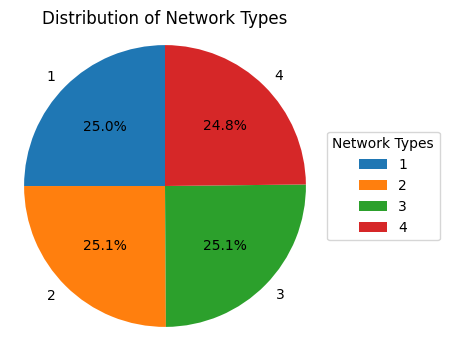

In [16]:
#menampilkan pie chart untuk menampilkan distribusi Network Type
import matplotlib.pyplot as plt

# ploting pie chat
network_type_counts = df['network_encoded'].value_counts().sort_index()
plt.figure(figsize=(4, 4))
plt.pie(network_type_counts, labels=network_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Network Types')
plt.axis('equal')

#create label & sorting
sorted_labels = [str(i) for i in sorted(network_type_counts.index)]
plt.legend(sorted_labels, title="Network Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Distribusi Data masih balance di antara class Network Type

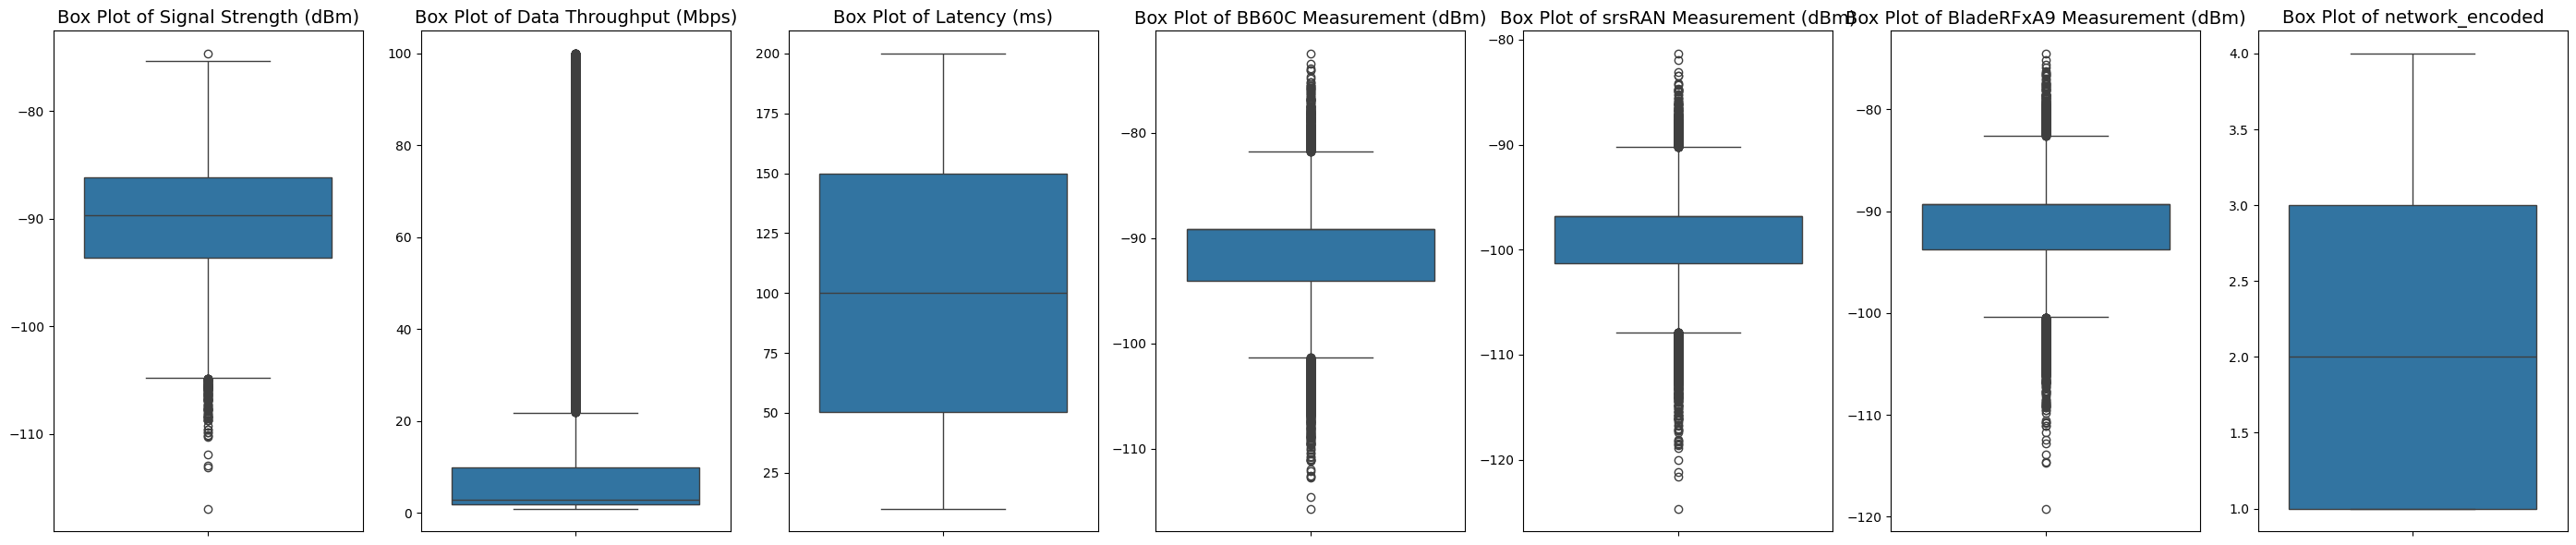

In [17]:
#Menampilkan boxplot dari data yang sudah di manipulasi
import matplotlib.pyplot as plt
import seaborn as sns

num_columns = df.columns
n_cols = len(num_columns)  # Jumlah kolom untuk menentukan jumlah subplot

fig, axes = plt.subplots(1, n_cols, figsize=(n_cols * 4, 6))  # Menyesuaikan figsize berdasarkan jumlah kolom

# Iterasi melalui setiap kolom untuk membuat box plot
for i, col in enumerate(num_columns):
    sns.boxplot(y=df[col], ax=axes[i])  # Membuat box plot untuk kolom
    axes[i].set_title(f'Box Plot of {col}', fontsize=14)  # judul subplot
    axes[i].set_ylabel('')  # Mengosongkan label sumbu y

plt.tight_layout()  # Menyesuaikan layout agar tidak ada overlap
plt.show()

Dari hasil visualisasi dengan boxplot, di temukan bahwa ada outlier di semua kolom, kecuali latency (ms), selanjut-nya akan coba di break down untuk masing-masing kelas dari network_encoded, yaitu network type yang sudah di encoding tadi.

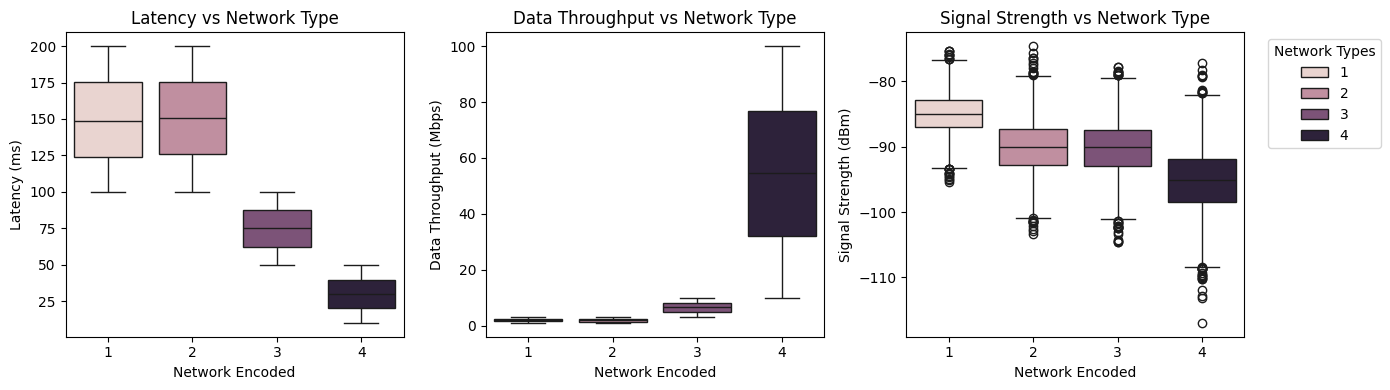

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat figure dan axes untuk subplot dengan 1 baris dan 3 kolom
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Boxplot untuk 'Latency (ms) vs network_encoded'
sns.boxplot(x='network_encoded', y='Latency (ms)', data=df, ax=axes[0], hue='network_encoded')
axes[0].set_title('Latency vs Network Type')  # Memberi judul subplot pertama
axes[0].set_xlabel('Network Encoded')  # Memberi label sumbu x
axes[0].set_ylabel('Latency (ms)')  # Memberi label sumbu y
axes[0].get_legend().remove()  # Menghapus legenda subplot pertama

# Boxplot untuk 'Data Throughput vs network_encoded' dengan warna yang ditentukan berdasarkan 'network_encoded'
sns.boxplot(x='network_encoded', y='Data Throughput (Mbps)', data=df, ax=axes[1], hue='network_encoded')
axes[1].set_title('Data Throughput vs Network Type')  # Memberi judul subplot kedua
axes[1].set_xlabel('Network Encoded')  # label sumbu x
axes[1].set_ylabel('Data Throughput (Mbps)')  # label sumbu y
axes[1].get_legend().remove()  # # Menghapus legenda subplot ke-dua

# Boxplot untuk 'Signal Strength vs network_encoded' dengan warna yang ditentukan berdasarkan 'network_encoded'
sns.boxplot(x='network_encoded', y='Signal Strength (dBm)', data=df, ax=axes[2], hue='network_encoded')
axes[2].set_title('Signal Strength vs Network Type')  # Memberi judul subplot ketiga
axes[2].set_xlabel('Network Encoded')  # label sumbu x
axes[2].set_ylabel('Signal Strength (dBm)')  # label sumbu y
axes[2].legend(title='Network Types', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menampilkan legend

plt.tight_layout()  # Menyesuaikan layout agar tidak ada overlap
plt.show()  # Menampilkan plot


Setelah di break down berdasarkan network encoded nya, terlihat bahwa masing-masing class dari network_encoded memiliki profile yang cukup berbeda significant satu dengan yang lain yang dapat menimbulkan nilai yang outlier, sehingga untuk data outlier tetap di biarkan/tidak di imputasi karena di anggap wajar.

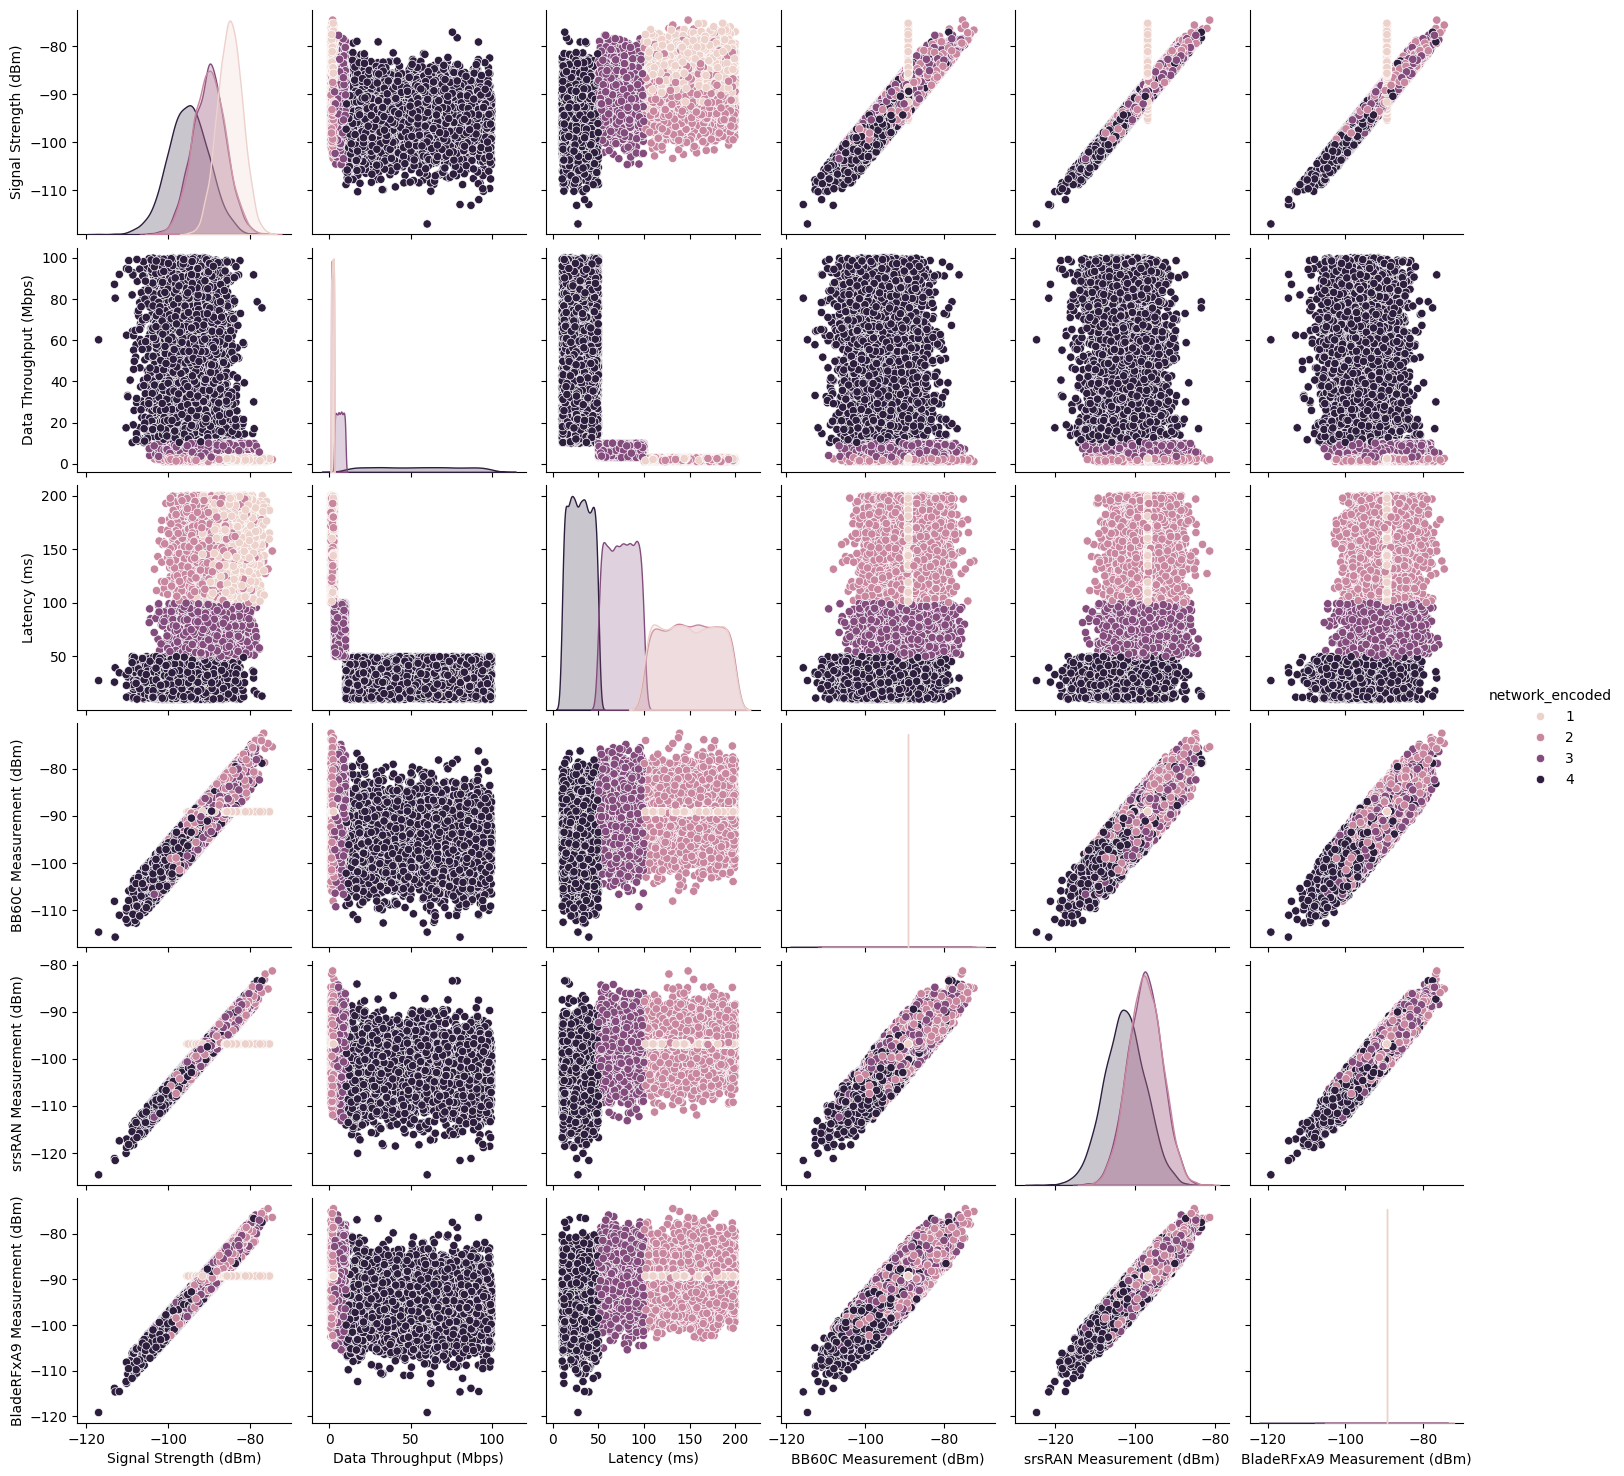

In [19]:
#Menampilkan pair plot keseluruhan data yang sudah di manipulasi
sns.pairplot(df, hue='network_encoded')
plt.show()

Untuk mempermudah pembacaan pair plot, maka akan di tampilkan menjadi 2 visualisasi, yaitu:
1. Kolom-kolom yang menggambarkan kekuatan signal dalam satuan dbm yang di ukur oleh masing-masing device,
2. kolom-kolom yang di ukur oleh device Steam Deck.

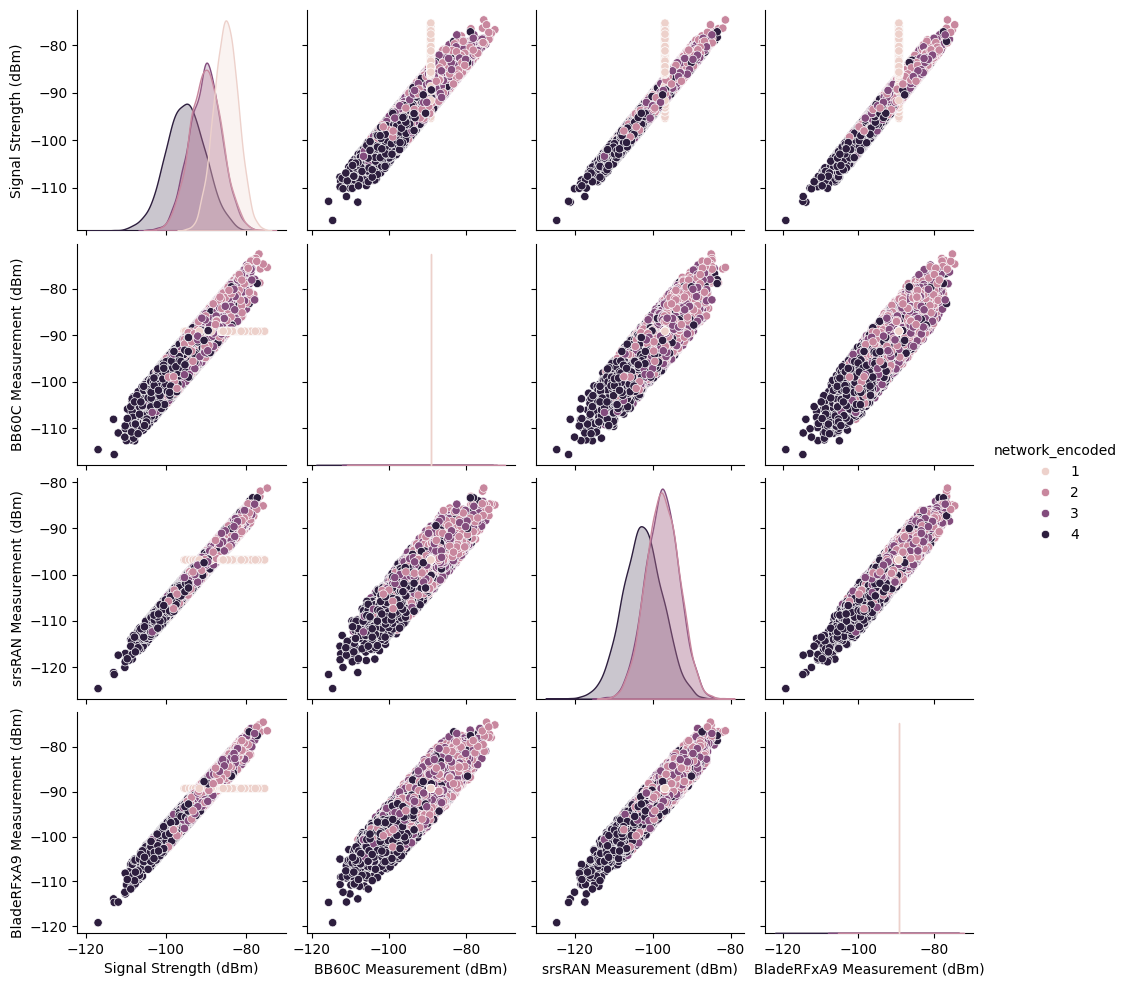

In [20]:
#Menampilkan visualisasi pair plot Kolom-kolom yang menggambarkan kekuatan signal dalam satuan dbm yang di ukur oleh masing-masing device
datalat = df[['Signal Strength (dBm)','BB60C Measurement (dBm)','srsRAN Measurement (dBm)','BladeRFxA9 Measurement (dBm)','network_encoded']]
sns.pairplot(datalat, hue='network_encoded')
plt.show()

Dari visualisasi Pair plot terlihat korelasi yang saling berbanding lurus di antara kolom dan memiliki pola distribusi yang terlihat mirip, selanjut nya nanti akan di cek lebih detail korelasi nya dengan menggunakan heatmap dan vif score.

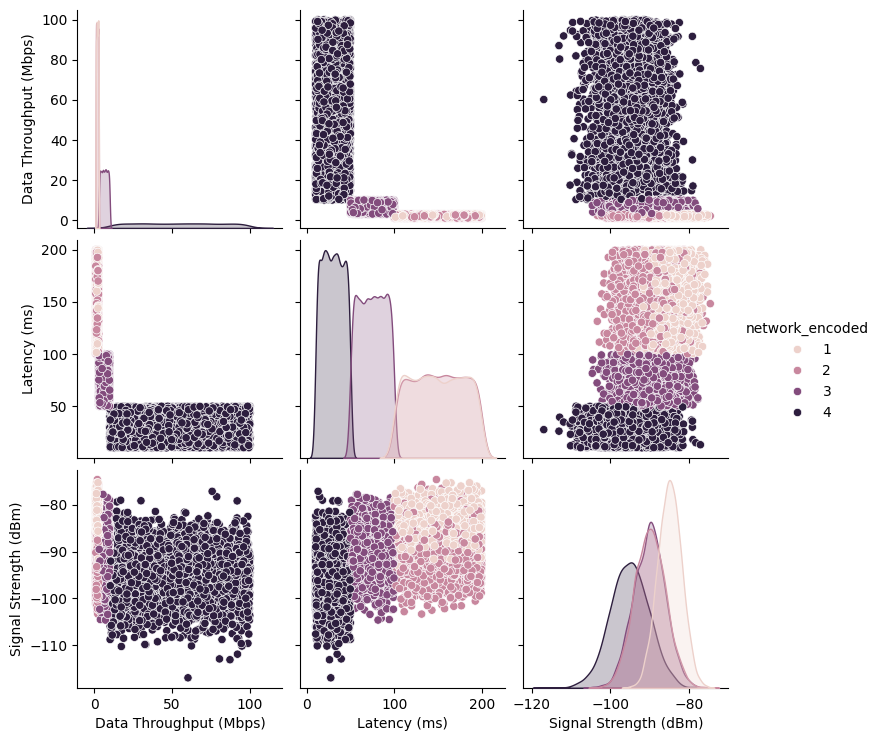

In [21]:
#Menampilkan visualisasi pair plot kolom-kolom yang di ukur oleh device Steam Deck.
datalat = df[['Data Throughput (Mbps)','Latency (ms)','Signal Strength (dBm)','network_encoded']]
sns.pairplot(datalat, hue='network_encoded')
plt.show()

-Data througput tetap lebih tinggi di network type 5G, walaupun signal strength nya yang diterima makin minus/lebih lemah.<br>
-Latency tetap lebih rendah  di network type 5G, walaupun signal strength nya yang diterima makin minus/lebih lemah.<br>
-Data Throughput berbanding terbalik dengan Latency.


In [22]:
correlation = df.corr()
correlation

,Signal Strength (dBm),Data Throughput (Mbps),Latency (ms),BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm),network_encoded
Signal Strength (dBm),1.000000,-0.483769,0.503550,0.787987,0.864278,0.852730,-0.632216
Data Throughput (Mbps),-0.483769,1.000000,-0.668173,-0.402826,-0.438738,-0.434879,0.703368
Latency (ms),0.503550,-0.668173,1.000000,0.362086,0.387941,0.386580,-0.865766
BB60C Measurement (dBm),0.787987,-0.402826,0.362086,1.000000,0.836380,0.825758,-0.399441
srsRAN Measurement (dBm),0.864278,-0.438738,0.387941,0.836380,1.000000,0.909571,-0.425988
BladeRFxA9 Measurement (dBm),0.852730,-0.434879,0.386580,0.825758,0.909571,1.000000,-0.424704
network_encoded,-0.632216,0.703368,-0.865766,-0.399441,-0.425988,-0.424704,1.000000


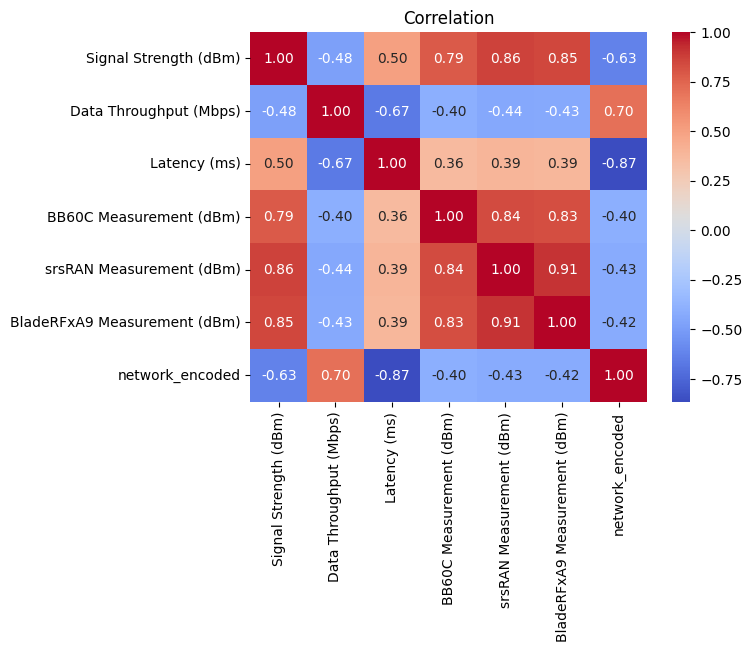

In [23]:
#menampilkan Heatmap korelasi
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation')
plt.show()

Dari Data visualisasi di atas temukan bahwa:<br>
- Semakin tinggi teknology Network Type,maka akan berbanding lurus dengan Data Throughput dan berbanding terbalik dengan Latency,<br>
- Signal strength 5G dan 4G masih lebih kecil dibanding kan dengan 3G dan LTE, walaupun demikian Data throughput dan Latency di 4G jauh lebih baik dibanding LTE <br>
- Signal strength, BB60C Measurement, srsRAN Measurement, BladeRFxA9 Measurement, yang menggambarkan kekuatan sinyal, terlihat memiliki korelasi yang sangat kuat satu sama lain nya, sehingga akan di lakukan multicolinearity study.
- Network encoded memiliki korelasi yang kuat dengan Latency (ms) dan Data Throughput (Mbps).

## **Multicollinearity Study**

In [24]:
#Multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler = StandardScaler()

predictors = df[['Latency (ms)', 'Data Throughput (Mbps)', 'Signal Strength (dBm)','BB60C Measurement (dBm)','srsRAN Measurement (dBm)','BladeRFxA9 Measurement (dBm)']]# Memilih variabel prediktor
predictors_scaled = scaler.fit_transform(predictors)# Standarisasi variabel prediktor

# Menghitung VIF
vif_data = pd.DataFrame()
vif_data["feature"] = predictors.columns
vif_data["VIF"] = [variance_inflation_factor(predictors_scaled, i) for i in range(predictors_scaled.shape[1])]

vif_data

,feature,VIF
0,Latency (ms),2.016844
1,Data Throughput (Mbps),1.945999
2,Signal Strength (dBm),5.150204
3,BB60C Measurement (dBm),3.720075
4,srsRAN Measurement (dBm),7.607111
5,BladeRFxA9 Measurement (dBm),6.819045


Setelah dilakukan Multicolinearit study dengan menggunakan VIF Score,  di temukan ada nya kolinearity antar fitur (VIF Score >4):<br>
Signal Strength (dBm), srsRAN Measurement (dBm), BladeRFxA9 Measurement (dBm).<br>
Berdasarkan heatmap, ketiga fitur tersebut yang memiliki korelasi yang kuat dengan fitur target "network_Encoded" adalah Signal Strength (dBm), sehingga yang lainnya di rekomendasikan untuk drop.

# Data Splitting for Features and Target Variable

In [25]:
# Split the data into features (X) and target variable (y)
# Drop srsRAN Measurement (dBm), BladeRFxA9 Measurement (dBm).
X = df.drop(['network_encoded','srsRAN Measurement (dBm)','BladeRFxA9 Measurement (dBm)'], axis=1)
y = df['network_encoded']

# Dataset Splitting into Training and Testing Sets + Feature Scaling

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model Building**

# **Random Forest**

In [28]:
#Inisialisasi model Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)# Prediksi pada set pengujian

Model Evaluation

In [29]:
# Cross-validation score
cv_score = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Score:", np.mean(cv_score))

# Model Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report for Random Forest:\n", class_report)

Cross-Validation Score: 0.9997772001485332
Accuracy: 0.9997029114676174
Confusion Matrix:
 [[842   0   0   0]
 [  1 847   0   0]
 [  0   0 823   0]
 [  0   0   0 853]]
Classification Report for Random Forest:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       842
           2       1.00      1.00      1.00       848
           3       1.00      1.00      1.00       823
           4       1.00      1.00      1.00       853

    accuracy                           1.00      3366
   macro avg       1.00      1.00      1.00      3366
weighted avg       1.00      1.00      1.00      3366



Model random forest dapat memprediksi dengan sangat akurat untuk class network type berdasarkan performancenya yaitu hingga 99.97% dengan kesalahan hanya 1 di semua class yang ada. Demikian pula dengan metric evaluasi lain-nya yaitu precision, recall, f1-score mempunyai nilai sempurna, yaitu 100%. Hal ini dapat dimungkinkan

# **`KNN Classifier dengan hyper parameter tuning**

In [30]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [31]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='accuracy')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='accuracy')

In [32]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.974597,2
1,{'n_neighbors': 3},0.976157,1
2,{'n_neighbors': 4},0.973111,4
3,{'n_neighbors': 5},0.973929,3
4,{'n_neighbors': 6},0.972072,6
5,{'n_neighbors': 7},0.972146,5
6,{'n_neighbors': 8},0.970883,7


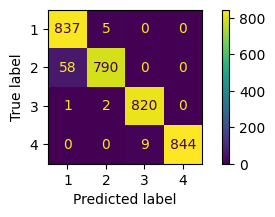

In [33]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(5,2))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [34]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.99      0.96       842
           2       0.99      0.93      0.96       848
           3       0.99      1.00      0.99       823
           4       1.00      0.99      0.99       853

    accuracy                           0.98      3366
   macro avg       0.98      0.98      0.98      3366
weighted avg       0.98      0.98      0.98      3366



Dari confussion metric dan classification report, Model KNN memiliki kinerja yang sangat baik dengan tingkat akurasi 98% dengan precision, recall, dan f1-score yang tinggi untuk semua kelas,kesalahan prediksi paling besar yaitu 58 terjadi dalam prediksi kelas 2 sebagai kelas 1, walaupun begitu, metrik evaluasi keseluruhan tetap tinggi, mengindikasikan kinerja yang kuat dari model.

**Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model regresi logistik
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Dictionary untuk menyimpan model
models = {'Logistic Regression': log_reg}

# Melatih model regresi logistik
models['Logistic Regression'].fit(X_train, y_train)  # Pelatihan model

# Membuat prediksi pada set pengujian
y_pred = models['Logistic Regression'].predict(X_test)


In [36]:
# Cross-validation score
cv_score = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Score:", np.mean(cv_score))

# Model Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report for Logistic regression:\n", class_report)

Cross-Validation Score: 0.9997772001485332
Accuracy: 0.8897801544860369
Confusion Matrix:
 [[650 191   1   0]
 [171 677   0   0]
 [  2   0 821   0]
 [  0   0   6 847]]
Classification Report for Logistic regression:
               precision    recall  f1-score   support

           1       0.79      0.77      0.78       842
           2       0.78      0.80      0.79       848
           3       0.99      1.00      0.99       823
           4       1.00      0.99      1.00       853

    accuracy                           0.89      3366
   macro avg       0.89      0.89      0.89      3366
weighted avg       0.89      0.89      0.89      3366



Dari confussion metric dan classification report, Model logistic regression memiliki kinerja yang cukup baik dengan tingkat akurasi 89% dengan precision, recall, dan f1-score yang cukup tinggi untuk semua kelas,namun ada kesalahan prediksi yang lebih tinggi untuk kelas 1 dan 2, yaitu network type 3G dan Lte, di bandingkan kelas 3 dan 4, yaitu 4G dan 5G.

# **EDA Questions**

1. Fitur manakah yang mempunyai korelasi yang terkuat dan terendah dengan target?

In [37]:
# Calculate the correlation matrix to find the relationship of features with the target

df_1 = df.drop(['srsRAN Measurement (dBm)','BladeRFxA9 Measurement (dBm)'], axis=1)
correlation_with_target = df_1.corr()['network_encoded'].sort_values(ascending=False)

correlation_with_target

network_encoded            1.000000
Data Throughput (Mbps)     0.703368
BB60C Measurement (dBm)   -0.399441
Signal Strength (dBm)     -0.632216
Latency (ms)              -0.865766
Name: network_encoded, dtype: float64

Berdasarkan analisis korelasi, fitur yang memiliki korelasi terkuat dengan target adalah Latency (ms) dengan korelasi negatif sebesar -0.865766, sedangkan fitur yang mempunyai korelasi terendah adalah BB60C Measurement (dBm) dengan korelasi negatif sebesar -0.399441.

2. Network type manakah yang mempunyai latency terendah dan tertinggi?

In [38]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mouriverd Laurent - Progress Script Final Project/signal_metrics.csv')
# Group by 'Network Type' and calculate the average latency for each network type
avg_latency_by_network = df.groupby('Network Type')['Latency (ms)'].mean()

# Identify the network types with the lowest and highest average latency
lowest_latency_network = avg_latency_by_network.idxmin()
highest_latency_network = avg_latency_by_network.idxmax()

(lowest_latency_network, highest_latency_network, avg_latency_by_network)

('5G',
 'LTE',
 Network Type
 3G     149.414617
 4G      74.846400
 5G      29.861568
 LTE    150.504659
 Name: Latency (ms), dtype: float64)

Berdasarkan rata-rata latensi untuk setiap jenis jaringan:

Jaringan dengan Latensi Terendah: 5G, dengan rata-rata latensi sekitar 29.86 ms.
Jaringan dengan Latensi Tertinggi: LTE, dengan rata-rata latensi sekitar 150.50 ms.

3. Network type manakah yang mempunyai Data Througput terendah dan tertinggi?

In [39]:
# Group by 'Network Type' and calculate the average data throughput for each network type
avg_throughput_by_network = df.groupby('Network Type')['Data Throughput (Mbps)'].mean()

# Identify the network types with the lowest and highest average data throughput
lowest_throughput_network = avg_throughput_by_network.idxmin()
highest_throughput_network = avg_throughput_by_network.idxmax()

(lowest_throughput_network, highest_throughput_network, avg_throughput_by_network)

('LTE',
 '5G',
 Network Type
 3G      2.006362
 4G      6.499208
 5G     54.584263
 LTE     1.994625
 Name: Data Throughput (Mbps), dtype: float64)

Berdasarkan rata-rata throughput data untuk setiap jenis jaringan:

jaringan dengan Throughput Data Tertinggi: 5G, seddangkan Jaringan dengan Throughput Data Terendah: LTE

4. Network type manakah yang mempunyai Signal Strength terendah dan tertinggi?

In [40]:
# Group by 'Network Type' and calculate the average signal strength for each network type
avg_signal_strength_by_network = df.groupby('Network Type')['Signal Strength (dBm)'].mean()

# Identify the network types with the lowest and highest average signal strength
lowest_signal_strength_network = avg_signal_strength_by_network.idxmin()
highest_signal_strength_network = avg_signal_strength_by_network.idxmax()

(lowest_signal_strength_network, highest_signal_strength_network, avg_signal_strength_by_network)

('5G',
 '3G',
 Network Type
 3G    -85.010978
 4G    -90.169674
 5G    -95.150218
 LTE   -89.995308
 Name: Signal Strength (dBm), dtype: float64)

Berdasarkan rata-rata kekuatan sinyal untuk setiap jenis jaringan:

Jaringan dengan Kekuatan Sinyal Terendah: 5G, dengan rata-rata kekuatan sinyal sekitar -95.15 dBm.
Jaringan dengan Kekuatan Sinyal Tertinggi: 3G, dengan rata-rata kekuatan sinyal sekitar -85.01 dBm.

5. Bagaimanakah hubungan antara data throughput, latency dan signal strength ?

In [41]:
# Calculate the correlation matrix to find the relationships among Data Throughput, Latency, and Signal Strength
correlation_matrix = df[['Data Throughput (Mbps)', 'Latency (ms)', 'Signal Strength (dBm)']].corr()
correlation_matrix

,Data Throughput (Mbps),Latency (ms),Signal Strength (dBm)
Data Throughput (Mbps),1.000000,-0.668173,-0.483769
Latency (ms),-0.668173,1.000000,0.503550
Signal Strength (dBm),-0.483769,0.503550,1.000000


Berdasarkan korelasi antara Data Throughput, Latency, dan Signal Strength:<br>
- Data Throughput dan Latency: Ada korelasi negatif yang cukup kuat (-0.668) antara throughput data dan latensi. Ini menunjukkan bahwa ketika latency rendah, throughput data cenderung tinggi, dan sebaliknya.<br>
- Data Throughput dan Signal Strength: Korelasi antara throughput data dan kekuatan sinyal adalah negatif (-0.484), menunjukkan bahwa kekuatan sinyal yang lebih rendah cenderung berhubungan dengan throughput data yang lebih tinggi.<br>
- Latency dan Signal Strength: Ada korelasi positif (0.504) antara latensi dan kekuatan sinyal. Ini berarti bahwa ketika kekuatan sinyal meningkat latensi cenderung meningkat juga.

# Insights and Recommendation

-Network Type sangat menentukan performance dari network dari sisi Latency dan data Throughput. Semakin tinggi technology networknya, maka latency akan semakin rendah dan Data Throughput akan semakin tinggi.<br>
-LTE memiliki performance yang mirip dengan 3G, dan jauh di bawah 4G, sehingga bisa dinggap bahwa LTE yang di maksud di sini sepertinya adalah 4G generasi awal.<br>
-Signal strength/kekuatan sinyal yang di terima oleh device dari 3G dan LTE, lebih besar dibanding kan 4G dan 5G, walaupun begitu performance 4G dan 5G (High Througput dan Low Latency) lebih baik dibandingkan 3G dan LTE, sehingga bisa di simpulkan bahwa signal strength yang di terima tidak berbanding lurus terhadap performance jaringan dalam case ini.<br>
-Untuk kepentingan bisnis terhadap costumer, maka di sarankan untuk lebih memperbanyak Network 4G dan 5G, mungkin juga bisa di lakukan dengan bertahap yaitu dengan mengupgrade Network type 3G dan LTE ke 4G , sedangkan yang sudah 4G bisa diupgrade ke 5G.<br>
-Berdasarkan model machine learning yang coba di uji yaitu Random Forest, Logistic Regression serta KNN Classifier, didapatkan ketiga model memiliki evaluation metric yang bagus, dengan Random forest yang memiliki accuracy 99.97%, kemudian KNN 98% dan Logistic regression dengan 88.97%.